# Negative Binomial

With a subset of significant explanatory variables.

In [1]:
# Import utility functions and package dependencies.
%run "./data_prep.ipynb"

## Train/Valid/Test Split

Split the data into 70% training, 20% validation, and 10% test.

In [2]:
df_train, df_valid, df_test = get_data_split()

print("Training data: {} observations".format(len(df_train)))
print("Validation data: {} observations".format(len(df_valid)))
print("Test data: {} observations".format(len(df_test)))

Training data: 522 observations
Validation data: 149 observations
Test data: 75 observations


## Model Creation

Create the Negative Binomial regression model using a subset of explanatory variables.

In [3]:
model_expr = "litter ~ employment_rate + income_rate + overcrowded_rate"

y_train, X_train = dmatrices(model_expr, df_train, return_type="dataframe")
y_valid, X_valid = dmatrices(model_expr, df_valid, return_type="dataframe")
alpha = 0.15

model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=alpha)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 litter   No. Observations:                  522
Model:                            GLM   Df Residuals:                      518
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.8
Date:                Wed, 26 Jan 2022   Deviance:                       454.14
Time:                        19:13:41   Pearson chi2:                     459.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3236
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5343      0.048     73.001      0.000       3.439       3.629
employment_rate     -1.6835      0.765     -2.200      0.028      -3.184      -0.183
income_rate          2.9286      0.579      5.060      0.000       1.794       4.063
overcrowded_rate     0.9584      0.218      4.394      0.000       0.531       1.386
====================================================================================
"""

## Fit Checking

The model fits the data well as the chi-squared value is greater than the reported statistic.

In [4]:
df_residuals = 518
pearson_chi2 = 459

chi_sq = scipy.stats.chi2.ppf(.05, df=df_residuals)

print(f"{pearson_chi2} <= {chi_sq}: {pearson_chi2 <= chi_sq}")

459 <= 466.21834122725073: True


## Prediction Visualisations

### Training

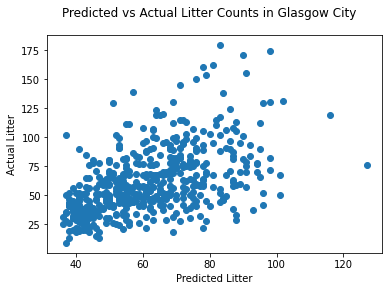

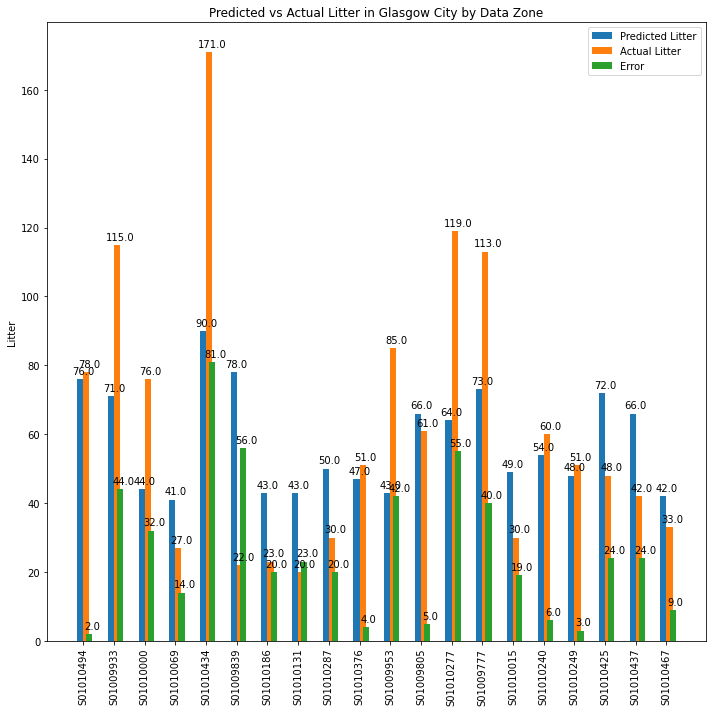

In [5]:
scatter_plot(model, X_train, y_train)
bar_plot(model, X_train, y_train)

### Validation

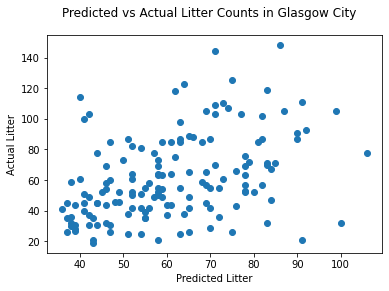

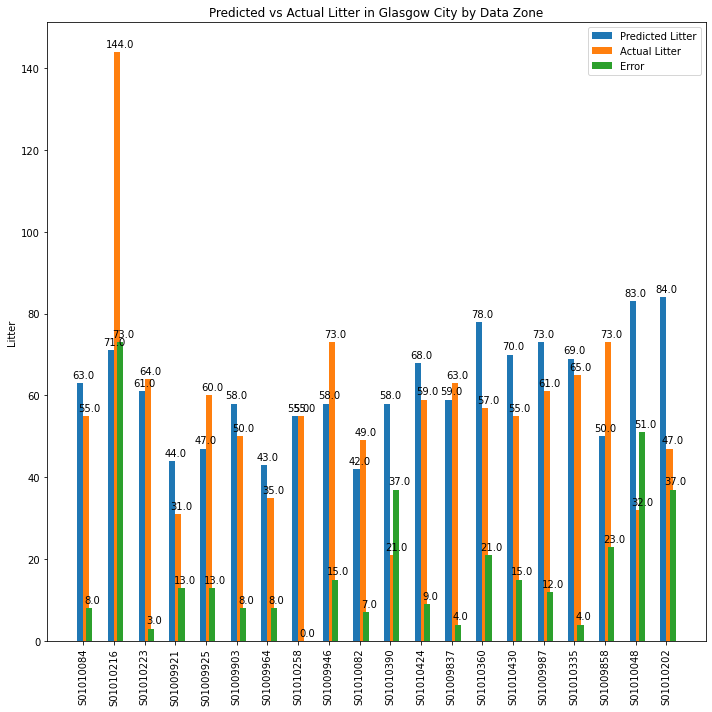

In [6]:
scatter_plot(model, X_valid, y_valid)
bar_plot(model, X_valid, y_valid)